# **Outlier**  

🔍 **Apa itu Outlier?**  
Outlier adalah data yang memiliki nilai yang sangat berbeda dibandingkan dengan data lainnya dalam suatu dataset.  

⚠ **Mengapa Outlier Muncul?**  
Outlier bisa terjadi karena:  
✅ **Kesalahan pengukuran** –  
✅ **Kesalahan input data** –

✅ **Fenomena yang jarang terjadi** –

🧐 **Mengapa Outlier Penting?**  
- Karena Bisa menyebabkan hasil analisis yang bias.
- Karena Dapat menunjukkan kejadian khusus yang perlu dianalisis lebih lanjut.  
- Karena Bisa membantu dalam deteksi anomali dalam sebuah data.

# **Deteksi Outlier Menggunakan Algoritma K-NN**  

---

**1. Rumus Jarak Euclidean**  
Rumus **jarak Euclidean** untuk satu dimensi (misalnya suhu):  

$$
d(x_i, x_j) = |x_i - x_j|
$$

Di mana:  
- \( x_i \) = nilai suhu titik data ke-\( i \)  
- \( x_j \) = nilai suhu titik data ke-\( j \)  

> 🔹 Untuk **multi-dimensi**, gunakan rumus:  
> $$
> d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}
> $$

---

**2. Rata-rata Jarak ke K Tetangga Terdekat**  
Setelah menghitung jarak ke semua titik, kita pilih **K tetangga terdekat** dan hitung **rata-rata jaraknya**:

$$
\bar{d}_i = \frac{1}{K} \sum_{j=1}^{K} d(x_i, x_j)
$$

Di mana:  
- \( 𝑑𝑖 \) = rata-rata jarak ke **K** tetangga terdekat dari titik **\( x_i \)**  
- \( K \) = jumlah tetangga terdekat (misalnya **K = 2**)  
- \( 𝑑(x_i, x_j) \) = jarak dari titik **\( x_i \)** ke **tetangga ke-\( j \)**  

---

**3. Menentukan Threshold Outlier**  
Gunakan **mean + 2 * standar deviasi** sebagai batas outlier:  

$$
Threshold = \mu + 2\sigma
$$

Di mana:  
- \( μ \) = **mean** dari semua (𝑑𝑖)  
- \( σ \) = **standar deviasi** dari (𝑑𝑖)  

Jika **rata-rata jarak suatu titik lebih besar dari threshold**, maka titik tersebut **outlier**.

---



## **Contoh Deteksi Manual Outlier dengan K-NN (Suhu)**
Metode **K-Nearest Neighbors (K-NN)** dapat digunakan untuk mendeteksi outlier dengan menghitung rata-rata jarak suatu titik data ke tetangga terdekatnya. Jika jaraknya jauh lebih besar dibandingkan data lain, maka titik tersebut bisa dianggap sebagai **outlier**.

---

## **Data**
Misalkan kita memiliki data suhu harian selama 10 hari (dalam °C):

    X = [28, 29, 30, 31, 29, 32, 30, 28, 27, 40]


Saya menggunakan **K = 2** dan **jarak Euclidean** untuk mendeteksi outlier.

---

## **Langkah-Langkah Deteksi Outlier**
### **1. Hitung Jarak Antar Titik**
Hitung Jarak Antara Setiap Titik Data

- Gunakan metrik Euclidean Distance (jarak antara dua titik dalam satu dimensi).

### **2. Menentukan Outlier**

- Nilai K = 2 (dua tetangga terdekat).

### **3. Hitung Rata-rata jarak ke K tetangga terdekat**

- Jika rata-rata jarak suatu titik jauh lebih besar dibandingkan dengan titik lain, maka titik tersebut dianggap sebagai outlier.
---
### **1. Hitung Jarak Antar Titik**
Gunakan **jarak Euclidean** (selisih absolut antara dua titik dalam satu dimensi).

| Suhu (°C) | Tetangga 1 | Jarak | Tetangga 2 | Jarak | Rata-rata Jarak |
|-----------|------------|-------|------------|-------|-----------------|
| 28        | 27         | 1     | 29         | 1     | (1+1)/2 = 1.0   |
| 29        | 28         | 1     | 30         | 1     | (1+1)/2 = 1.0   |
| 30        | 29         | 1     | 31         | 1     | (1+1)/2 = 1.0   |
| 31        | 30         | 1     | 32         | 1     | (1+1)/2 = 1.0   |
| 32        | 31         | 1     | 30         | 2     | (1+2)/2 = 1.5   |
| 27        | 28         | 1     | 29         | 2     | (1+2)/2 = 1.5   |
| 40        | 32         | 8     | 31         | 9     | (8+9)/2 = 8.5   |



### **2. Menentukan Outlier**
- Hampir semua titik memiliki rata-rata jarak **1 - 1.5**.
- **Suhu 40°C memiliki rata-rata jarak ke tetangga sebesar 8.5**, jauh lebih besar dibandingkan lainnya.
- Maka, **suhu 40°C adalah outlier**.

### **3. Hitung Rata-rata jarak ke K tetangga terdekat**

- Rata-rata jarak kebanyakan nilai = 1.0 hingga 1.5
- Suhu 40°C memiliki rata-rata jarak 8.5, yang jauh lebih besar dibandingkan yang lain.
- Maka Metode **K-NN Outlier** mendeteksi bahwa **40°C** adalah outlier dalam data ini.
---




# ✅Langkah-langkah Mendeteksi Outlier Dengan Algoritma K-NN Dengan Code

In [ ]:
!pip install pymysql #Install library Python yang menjadi koneksi dan interaksi dengan database MySQL

In [ ]:
!pip install psycopg2-binary #Install library Python yang menjadi koneksi dan interaksi dengan database MySQL

In [ ]:
!pip install pymysql pandas #instal PyMySQL (untuk koneksi MySQL) dan pandas (untuk manipulasi data dalam bentuk tabel).

In [ ]:
import pandas as pd
from sqlalchemy import create_engine #koneksi database menggunakan SQLAlchemy.
import numpy as np #Operasi numerik dan array multidimensi.
import pandas as pd
from sklearn.neighbors import NearestNeighbors #Algoritma machine learning untuk pencarian tetangga terdekat (Nearest Neighbors).
from tabulate import tabulate #menampilkan data dalam format tabel

#Cek koneksi Database MySQL
Periksa apakah code berhasil import data dari Database MySQL

In [ ]:
import pymysql

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"  # Ganti host dengan host dari Aiven.io
port = 19867    # Ganti posrt dengan posrt dari Aiven.io
user = "avnadmin" # Ganti user dengan user dari Aiven.io
password = "AVNS_vnxDk9lOvZgFnuKlezN" # Ganti password dengan password dari Aiven.io
database = "defaultdb" # Ganti database dengan database dari Aiven.io

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}  # Jika menggunakan SSL
)

#menampilkan data
cursor = mysql_conn.cursor()
cursor.execute("SELECT * FROM iris_sql.iris LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
mysql_conn.close()


(1, 'Iris-setosa', 1.4, 0.2)
(2, 'Iris-setosa', 14.0, 2.0)
(3, 'Iris-setosa', 1.3, 0.2)
(4, 'Iris-setosa', 1.5, 0.2)
(5, 'Iris-setosa', 1.4, 0.2)


#Cek koneksi Database PostgreSQL
Memeriksa apakah code berhasil import data dari Database PostgreSQL

In [ ]:
import psycopg2

# Konfigurasi koneksi
host = "postgrependata-ilhamalmafazt-dm.i.aivencloud.com"
port = 19867
user = "avnadmin"
password = "AVNS_yBhPcNuf-iJ2fja4CBU"
database = "defaultdb"

# Buat koneksi
postgres_conn = psycopg2.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    sslmode="require"
)

#menampilkan data
cursor = postgres_conn.cursor()
cursor.execute("SELECT * FROM postgre.postgre LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
postgres_conn.close()



(1, 'Iris-setosa', 5.1, 3.5)
(3, 'Iris-setosa', 4.7, 3.2)
(4, 'Iris-setosa', 4.6, 3.1)
(5, 'Iris-setosa', 5.0, 3.6)
(6, 'Iris-setosa', 5.4, 3.9)


#MERGING DATA
Code ini bertujuan untuk menghubungkan dua database yang berbeda menjadi satu

In [ ]:
import pymysql
import psycopg2
import pandas as pd
from tabulate import tabulate

# Konfigurasi koneksi MySQL (Aiven.io)
mysql_conn = pymysql.connect(
    host="mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com",
    port=19867,
    user="avnadmin",
    password="AVNS_vnxDk9lOvZgFnuKlezN",
    database="defaultdb",
)

# Konfigurasi koneksi PostgreSQL (Aiven.io)
postgres_conn = psycopg2.connect(
    host="postgrependata-ilhamalmafazt-dm.i.aivencloud.com",
    port=19867,
    user="avnadmin",
    password="AVNS_yBhPcNuf-iJ2fja4CBU",
    database="defaultdb",
    sslmode="require"
)

# Ambil data dari MySQL
mysql_query = "SELECT id, `petal length`, `petal width` FROM iris_sql.iris;"
df_mysql = pd.read_sql(mysql_query, mysql_conn)

# Ambil data dari PostgreSQL
postgres_query = "SELECT * FROM postgre.postgre;"
df_postgres = pd.read_sql(postgres_query, postgres_conn)

# Tutup koneksi
mysql_conn.close()
postgres_conn.close()

# Gabungkan data secara vertikal
df_combined = pd.merge(df_postgres, df_mysql, on="id", how="left")

# Tampilkan data dalam format tabel yang lebih rapi
print(tabulate(df_combined, headers='keys', tablefmt='grid'))


<ipython-input-26-42938d1cca3b>:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_mysql = pd.read_sql(mysql_query, mysql_conn)
<ipython-input-26-42938d1cca3b>:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_postgres = pd.read_sql(postgres_query, postgres_conn)


+-----+------+-----------------+----------------+---------------+----------------+---------------+
|     |   id | Class           |   sepal length |   sepal width |   petal length |   petal width |
+=====+======+=================+================+===============+================+===============+
|   0 |    1 | Iris-setosa     |            5.1 |           3.5 |            1.4 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   1 |    3 | Iris-setosa     |            4.7 |           3.2 |            1.3 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   2 |    4 | Iris-setosa     |            4.6 |           3.1 |            1.5 |           0.2 |
+-----+------+-----------------+----------------+---------------+----------------+---------------+
|   3 |    5 | Iris-setosa     |            5   |           3.6 |            1.4 |           0.2 |
+-----+---

#Code Deteksi Outlier dengan Algoritma K-NN - Euclidean Distance

In [ ]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors #import model Nearest Neighbors dari Library scikit-learn.
from tabulate import tabulate

# Menentukan fitur yang digunakan dalam perhitungan jarak
feature_column = ['petal length', 'petal width', 'sepal length', 'sepal width']

# Mengambil data fitur dari dataframe df_combined
X = df_combined[feature_column]

# Mengisi nilai yang kosong (NaN) dengan rata-rata dari masing-masing kolom
X = X.fillna(X.mean())

# jumlah tetangga terdekat (k)
nilai_k = 5

# model Nearest Neighbors dengan matriks Euclidean
knn = NearestNeighbors(n_neighbors=nilai_k, metric='euclidean')
knn.fit(X)

# Menghitung jarak Euclidean terdekat
distances, _ = knn.kneighbors(X)

# Membuat dataframe baru untuk menyimpan fitur dan jarak Euclidean rata-rata
df_features = pd.DataFrame(X, columns=feature_column)

# rata-rata jarak ke tetangga terdekat
df_features['euclidean_distance'] = distances.mean(axis=1)

print("Hasil dari perhitungan jarak menggunakan Euclidean")
print(tabulate(df_features[["sepal length", "sepal width", "petal length", "petal width", "euclidean_distance"]], headers="keys", tablefmt="grid"))

Hasil dari perhitungan jarak menggunakan Euclidean
+-----+----------------+---------------+----------------+---------------+----------------------+
|     |   sepal length |   sepal width |   petal length |   petal width |   euclidean_distance |
+=====+================+===============+================+===============+======================+
|   0 |            5.1 |           3.5 |        1.4     |       0.2     |             0.104853 |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   1 |            4.7 |           3.2 |        1.3     |       0.2     |             0.183104 |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   2 |            4.6 |           3.1 |        1.5     |       0.2     |             0.156636 |
+-----+----------------+---------------+----------------+---------------+----------------------+
|   3 |            5   |           3.6 |        1.4     |       0.2     |   

In [ ]:
Q1 = df_features['euclidean_distance'].quantile(0.25)
Q3 = df_features['euclidean_distance'].quantile(0.75)

IQR = Q3 - Q1

# Menentukan batas bawah dan atas
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Ambil data outlier
# Merge df_features with df_combined to have all columns for outlier analysis
df_combined = pd.merge(df_combined, df_features[['euclidean_distance']], left_index=True, right_index=True)
outliers = df_combined[(df_combined['euclidean_distance'] < batas_bawah) |
                      (df_combined['euclidean_distance'] > batas_atas)]
outlier_terbesar = outliers.loc[outliers['euclidean_distance'].idxmax()]

print("Outlier Terbesar:")
print(tabulate(outlier_terbesar.to_frame().T, headers="keys", tablefmt="grid"))

Outlier Terbesar:
+-----+------+-------------+----------------+---------------+----------------+---------------+----------------------+
|     |   id | Class       |   sepal length |   sepal width |   petal length |   petal width |   euclidean_distance |
+=====+======+=============+================+===============+================+===============+======================+
| 149 |    2 | Iris-setosa |           40.9 |            30 |             14 |             2 |              34.5513 |
+-----+------+-------------+----------------+---------------+----------------+---------------+----------------------+


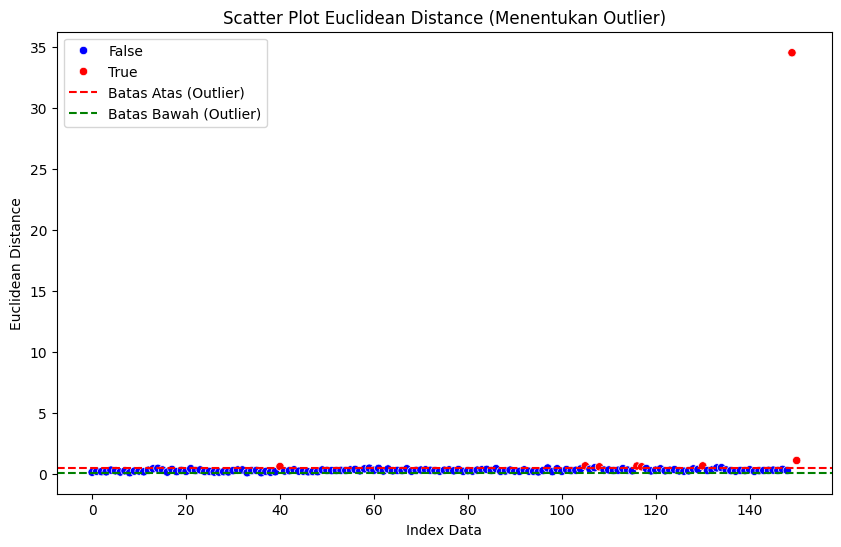

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan ukuran 10x6
plt.figure(figsize=(10, 6))

# Scatter plot Euclidean Distance dengan warna merah untuk outlier
sns.scatterplot(x=range(len(df_combined)), y=df_combined['euclidean_distance'],
                hue=df_combined['euclidean_distance'] > batas_atas,
                palette={False: "blue", True: "red"})

# garis batas bawah dan atas
plt.axhline(y=batas_atas, color='r', linestyle='--', label="Batas Atas (Outlier)")
plt.axhline(y=batas_bawah, color='g', linestyle='--', label="Batas Bawah (Outlier)")

# judul, dan label sumbu
plt.legend()
plt.title("Scatter Plot Euclidean Distance (Menentukan Outlier)")
plt.xlabel("Index Data")
plt.ylabel("Euclidean Distance")

plt.show()


- Dapat dilihat bahwa mem-visualisasikan data sangat efektif untuk mendeteksi Outlier